## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [19]:
# first method to calculate the proportion of users converted
df.query('converted == 1').user_id.count()/df.user_id.count()

0.11965919355605512

In [7]:
# second method to calculate the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# trying another method to make the question more clear
df.query("group != 'treatment' and landing_page == 'new_page' ").shape[0] \
+ df.query("group == 'treatment' and landing_page == 'old_page' ").shape[0]

3893

In [9]:
# make the question more clear
df.query("group == 'control' and landing_page == 'new_page' ").shape[0] \
+ df.query("group == 'treatment' and landing_page == 'old_page' ").shape[0]

3893

In [10]:
# finishing the explanation
1928 + 1965

3893

In [11]:
# the easy way to find The number of times the new_page and treatment don't match
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [13]:
# an easiest and clear  way to check the missing values, so I see it better than info()
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# df2 without the rows where treatment does not match with new_page\
#or control does not match with old_page
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [16]:
# another method to remove he rows\
# where treatment does not match with new_page or control does not match with old_page
df3 = df[((df.group == "control") & (df.landing_page == "old_page")) | \
         ((df.group == "treatment") & (df.landing_page == "new_page"))]

In [17]:
# check the df3 too
df3[((df3['group'] == 'treatment') == (df3['landing_page'] == 'new_page')) == False].shape[0]

0

In [18]:
# check df2 and df3 if they are identical for all columns or not(this's just for me so don't care)
d2 = []
for d2_user_id in df2.user_id:
    d2.append(d2_user_id)
d3 = []
for d3_user_id in df3.user_id:
    d3.append(d3_user_id)
print(d2 == d3)
d4 = []
for d4_timestamp in df2.timestamp:
    d4.append(d4_timestamp)
d5 = []
for d5_timestamp in df3.timestamp:
    d5.append(d5_timestamp)
print(d4 == d5)
d6 = []
for d6_group in df2.group:
    d6.append(d6_group)
d7 = []
for d7_group in df3.group:
    d7.append(d7_group)
print(d6 == d7)
d8 = []
for d8_landing_page in df2.group:
    d8.append(d8_landing_page)
d9 = []
for d9_landing_page in df3.group:
    d9.append(d9_landing_page)
print(d8 == d9)
d10 = []
for d10_converted in df2.converted:
    d10.append(d10_converted)
d11 = []
for d11_converted in df3.converted:
    d11.append(d11_converted)
print(d10 == d11)

True
True
True
True
True


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [19]:
# compare the old data set with the new one and check unique user_ids
print('df unique user_ids:',df.user_id.nunique(),',df shape:',df.shape)
print('df2 unique user_ids:',df2.user_id.nunique() ,',df2 shape:', df2.shape)

df unique user_ids: 290584 ,df shape: (294478, 5)
df2 unique user_ids: 290584 ,df2 shape: (290585, 5)


b. There is one **user_id** repeated in **df2**.  What is it?

In [20]:
df2[df2.user_id.duplicated(keep=False)].iloc[:,0]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [21]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
df2 = df2.drop_duplicates(['user_id'], keep='last')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
(df2.query('converted == 1').user_id.count()/df2.user_id.count()).round(4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [31]:
(df2[((df2.group == "control") & (df2.converted == 1))].user_id.count()/\
df2.query('group == "control"').user_id.count()).round(3)

0.12

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [32]:
(df2[((df2.group == "treatment") & (df2.converted == 1))].user_id.count()/\
df2.query('group == "treatment"').user_id.count()).round(4)

0.1188

d. What is the probability that an individual received the new page?

In [42]:
(df2.query('landing_page == "new_page"').user_id.count()/df2.user_id.count()).round(2)

0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
<br>
<font color=blue>*From **part d**, we know that a round 0.12% of users converted overall.* 
<br>*looking at the probabilities by group in **parts b and c**, we found that given an individual belongs to the treatment group or control group respectively, the conversion probabilitiy is about 0.12% for both cases. Since we know from **d** that the probability an inidividual received the new pages around 50%, both groups are more or less of same size, so the probability values are indeed comparable.*
<br>*so,tell now, we do **not** have enough evidence that one page leads to more conversions*</font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
<br>
<font color=blue>the null hypothesis *$H_0$*: $\hspace{0.3cm}$ $p_{new} - p_{old} \leq 0$
 <br> the alternative hypothesis *$H_1$*: $\hspace{0.3cm}$ $p_{new} - p_{old} > 0$</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [35]:
p_new = df2.query('converted == 1').user_id.count()/df2.user_id.count()
p_new

0.11959667567149027

In [34]:
# p_new in another way to find it
p_new = df2['converted'].mean()
p_new.round(4)

0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [33]:
p_old = p_new
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [32]:
n_new =df2.query('landing_page == "new_page"').shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [36]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [86]:
#make samples with binomial distribution that we learned in coin flips lessons
# and set the random seed to 0
np.random.seed(0)
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted 

array([0, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [87]:
#make samples from a binomial distribution and set the random seed to 0 
np.random.seed(0)
old_page_converted = np.random.binomial(1, p_old,n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [88]:
new_page_converted.mean() - old_page_converted.mean()

2.4351737870437207e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [89]:
#Simulate 10000 samples of the differences in conversion rates
np.random.seed(0)
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

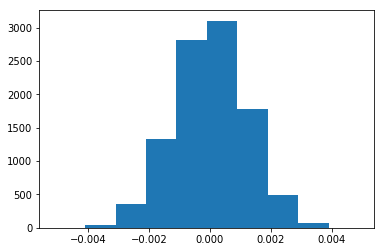

In [90]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [91]:
# actual difference of converted rates
actual_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]\
                                                                        ['converted'].mean())
actual_diff

-0.0015790565976871451

In [93]:
# Convert to numpy array and calculate the p-value
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()

0.90880000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
<font color=blue>
#### Actual difference represents the difference between converted rates of new page and old page, based on our data.
#### p-diffs represents the simulated difference between converted rates of new page and old page, based on 10000 simulated samples.
#### The percentage of 90.8 is called scientifically p-value, which determines the probability of obtaining our observed statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. </font>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [94]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [97]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score

-1.3116075339133115

In [98]:
p_value

0.90517370514059103

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
<font color = blue> 
  ### we should fail to reject the null hypothesis###

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
<font color = blue>
## Logistic regression##

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [99]:
df2['intercept']=1
ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [100]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [101]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:               8.085e-06
Time:                        01:29:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
<font color = blue>
#### the p-value associated with ab_page column is 0.19 which is lower than the p-value calculated using the z-score function. The reason why is different is due to the intercept added.

### the logistic regression determines only two possible outcomes. If the new page is equal to the old page or different.

the null hypothesis  *$H_0$*: $\hspace{0.3cm}$ $p_{new} - p_{old} = 0$
<br> the alternative hypothesis *$H_1$*: $\hspace{0.3cm}$ $p_{new} - p_{old} \neq 0$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
<font color = blue> 
#### we could consider introducing the timestamp metric to determine in which part of the day the individuals converted the most. For example, if we find that the evening is the period that users spend most of their time on the internet we might also take it into consideration.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [102]:
countries = pd.read_csv('./countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [103]:
countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [110]:
new_df = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [113]:
# we don't UK to get full rank matrix
new_df[['CA', 'US']] = pd.get_dummies(new_df['country'])[['CA','US']]
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [115]:
new_df['intercept'] = 1
log_mod = sm.Logit(new_df['converted'], new_df[['CA', 'US', 'intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:               2.324e-05
Time:                        02:20:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0